
# Diabetes prediction using LR, SVM and MLP

This project we have implemented a framework for diabetes prediction emplying data preprocessing, hyperparameter tuning, different Machine Learning (ML) classifiers and data visualizations. 

We have applied data splitting, check for missing values, and scaling using StandardScaler to normalize our data. 

For hyperparameter tuning, GridsearchCV is applied that implements both grid search and K-fold cross-validation together. In this project 5-fold cross validation is applied. 

For ML classifier we choose Logistic regression (LR), Support Vector machine (SVM), Decision Tree (DT) and Multilayer Perceptron (MLP) classifier. 

Validation is performed by using accuracy, precision, recall, f1-score and confusion matrix. 

Data visualization is presented by using  confusion matrix,classification report and ROC curve.

Performance of the 4 different models is evaluated by comparing the accuracy, confusion matrix and ROC curve

In [ ]:
##installing important libraries
!pip install --upgrade scikit-learn==1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
##importing important libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, classification_report,confusion_matrix, roc_curve, auc

%matplotlib inline

In [ ]:
## mounting my local drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## unzipping the file for dataset
!unzip "/content/archive(2).zip"

Archive:  /content/archive(2).zip
  inflating: diabetes.csv            


In [ ]:
## read the dataset
#For Colab,
df = pd.read_csv('/content/diabetes.csv')
print("Reading the diabetes dataset.........")

#for Jupyter notebook,
#df = pd.read_csv('diabetes.csv')
#print("Reading the diabetes dataset.........")

Reading the diabetes dataset.........


In [ ]:
## shape of the dataset
df.shape

(2000, 9)

In [ ]:
## print 1st 5 row of the dataset
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
# indormation of data for further preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


There aren't any blanks and there are 2000 records and 9 features

In [ ]:
# Print full data statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


# Preprocessing

In [ ]:
# Find which data entries are null
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False


In [ ]:
#Find number of missing values (null values) in each column 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#As there is no missing values, no need of replacing the missing values

Data visualization before implementing ML model

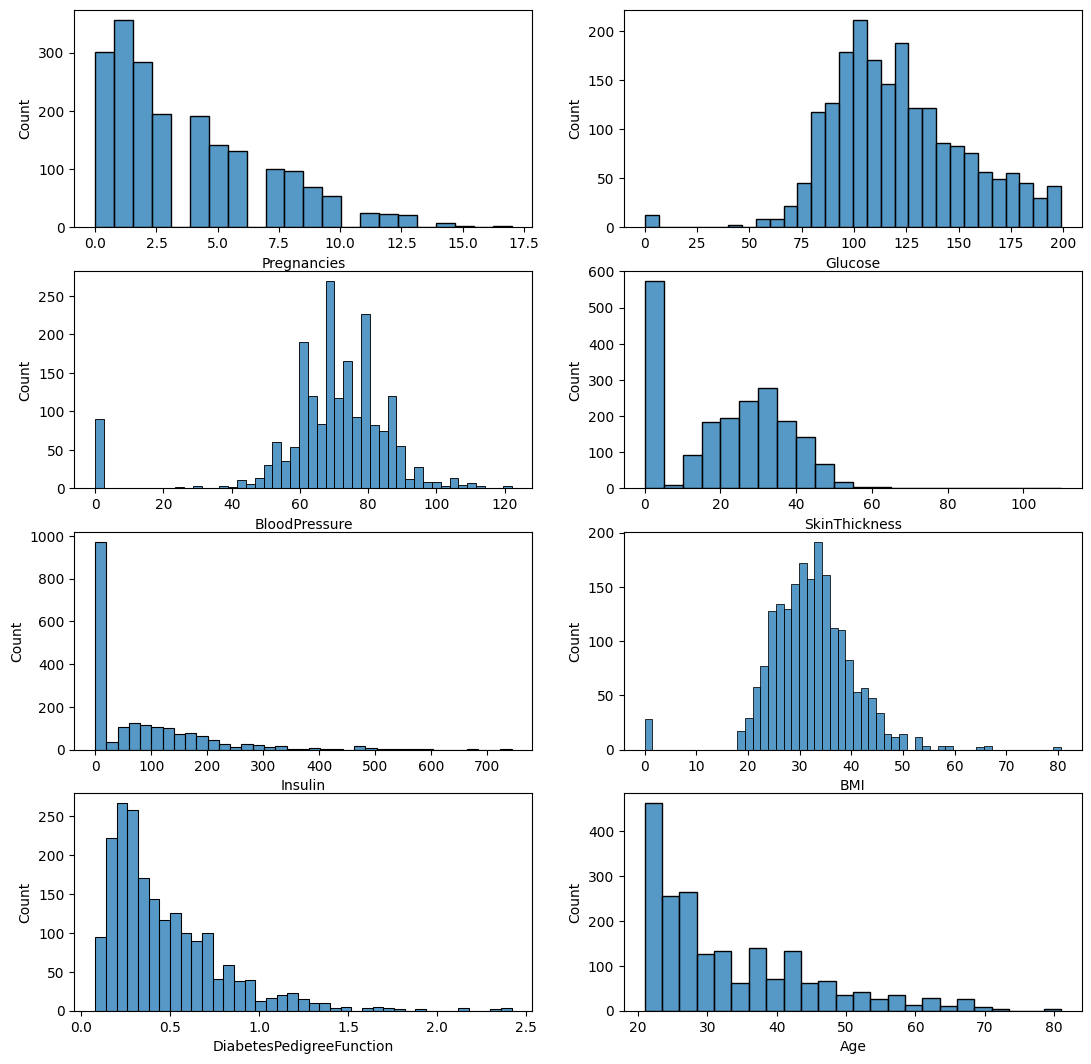

In [ ]:
##Task is to show the histogram of the dataset.
##Here the attributes are visualized using sns histplot() function
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(13,13))
for i in enumerate(cols):
    plt.subplot(4,2,i[0]+1)
    sns.histplot(df[i[1]])

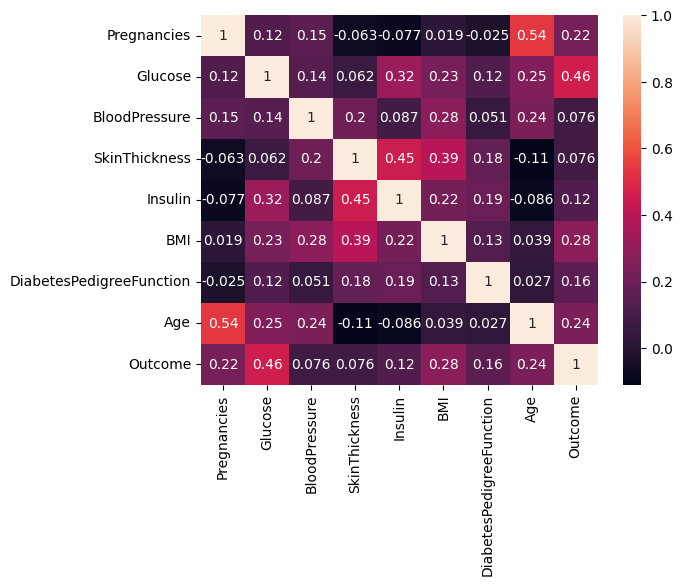

In [ ]:
##task to create a heatmap using the seaborn library in Python to visualize the correlation matrix of a dataset
#The df.corr() function computes the pairwise correlation of columns in a DataFrame
#sns.heatmap() function creates a heatmap to display the correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.show()

### Dataset splitting

In [ ]:
## Print the colums of the dataset for further task
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#x-independent variables: features
#y-dependent variables: labels/target
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
#Storing features as X
X = np.asarray(df[features])
#Storing labels as y
y = np.asarray(df['Outcome'])

In [ ]:
# Split your data into training and testing datasets
# 15% data is for testing purpose, 85% is for training purpose
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=0, test_size=.15)
print("Shape of the training feature : " + str(X_train.shape))
print("Shape of the testing feature : " + str(X_val.shape))
print("Shape of the training label : " + str(y_train.shape))
print("Shape of the testing label : " + str(y_val.shape))

Shape of the training feature : (1700, 8)
Shape of the testing feature : (300, 8)
Shape of the training label : (1700,)
Shape of the testing label : (300,)


## Data scaling

By scaling the data, the range of values for each feature is transformed to have a mean of 0 and a standard deviation of 1, which allows the algorithm to treat each feature equally when making predictions. This can improve the accuracy and performance of the machine learning model.

In [ ]:
# Check the range of each feature whether do I need scaling or not
for col in df.columns:
    print(col, '-','min:', df[col].min(), 'max:', df[col].max())

Pregnancies - min: 0 max: 17
Glucose - min: 0 max: 199
BloodPressure - min: 0 max: 122
SkinThickness - min: 0 max: 110
Insulin - min: 0 max: 744
BMI - min: 0.0 max: 80.6
DiabetesPedigreeFunction - min: 0.078 max: 2.42
Age - min: 21 max: 81
Outcome - min: 0 max: 1


As there are no categorical features, no need of encoding, however there are huge ranges of features. So, to minimize the range of different featues we should use scaling. We choose to StandardScaler() scaler to have Mean of zero, variance of one.

In [ ]:
#normalizer 
scaler=StandardScaler()
scaler.fit(X_train)
# transform data
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
#print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (1700, 8)
per-feature minimum before scaling:
 [ 0.     0.     0.     0.     0.     0.     0.078 21.   ]
per-feature minimum after scaling:
 [-1.12944086 -3.79591081 -3.58472643 -1.29259122 -0.71900226 -3.95202567
 -1.20124498 -1.03552552]
per-feature maximum before scaling:
 [ 17.   199.   122.   110.   744.    80.6    2.42  81.  ]
per-feature maximum after scaling:
 [4.08558404 2.4240003  2.75521509 5.51511896 5.85076724 5.9204371
 5.83819352 4.1344991 ]


## Hyperparameter tuning

Before training, parameters must be tuned. Different values of hyperparameters can lead to different models with varying levels of accuracy and generalization. By tuning the hyperparameters, we can find the best possible model for a given task. In this project we use GridSearchCV() function that implements both grid search and cross-validation together.


Here, cv=5 specifies that the data will be split into 5 equal parts (or "folds") for cross-validation.

In [ ]:
## Hyperparameter tuning
## Logistic Regression
'''Only hyperparameter being tuned is C, which controls the regularization strength of the logistic regression model.
The values of C in this grid are [0.001, 0.01, 0.1, 1, 10, 100].
The model will be trained and evaluated with each of these values of C, and the best value will be 
selected based on a performance metric, such as accuracy'''
## Define the LR hyperparameters to tune and their possible values
logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
## Create a GridSearchCV object with the LR model and hyperparameters to tune
logreg_grid = GridSearchCV(LogisticRegression(), logreg_param_grid, cv=5)
## Fit the GridSearchCV object to the training data
logreg_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']})

In [ ]:
## Hyperparameter tuning
# SVM
'''The values of C in this grid are [0.001, 0.01, 0.1, 1, 10, 100] 
the kernel function used to transform the input data into a higher-dimensional space, where it may become easier to separate. 
The available kernel functions in scikit-learn are 'linear', 'poly', 'rbf', and 'sigmoid'
'''
## Define the SVM hyperparameters to tune and their possible values
svm_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
## Create a GridSearchCV object with the SVM model and hyperparameters to tune
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5)
## Fit the GridSearchCV object to the training data
svm_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
## Hyperparameter tuning
#  Decision Tree
'''max_depth hyperparameter controls the complexity of the model.
The list [3, 5, 7, 10] specifies the candidate values that will be used for the max_depth hyperparameter during hyperparameter tuning. 
The min_samples_split hyperparameter controls the minimum amount of data required at each split.
The list [2, 5, 10] specifies the candidate values that will be used for the min_samples_split hyperparameter during hyperparameter tuning.
The min_samples_leaf hyperparameter controls the minimum amount of data required at each leaf. 
The list [1, 2, 4] specifies the candidate values that will be used for the min_samples_leaf hyperparameter during hyperparameter tuning.
'''
dt_param_grid = {'max_depth': [3,5,7,10],'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
dt_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
## Hyperparameter tuning
# MLP
'''The hidden_layer_sizes hyperparameter controls the complexity of the model. 
The list [(12,), (100,), (20,30,50), (50,100)] specifies the candidate values that will be used for the hidden_layer_sizes hyperparameter during hyperparameter tuning
The activation function controls the output of each neuron in the hidden layer. The list ['logistic', 'tanh', 'relu'] is used for the activation hyperparameter during hyperparameter tuning.
solver controls how the weights of the MLP are updated during training. The list ['sgd', 'adam'] is used during hyperparameter tuning.
The learning rate controls the step size taken by the optimizer when updating the weights of the MLP. The list [0.001, 0.05] is used during hyperparameter tuning.
The learning rate schedule controls how the learning rate changes over time. The list ['constant', 'adaptive'] specifies the candidate values that will be used for hyperparameter tuning.
'''
mlp_param_grid =  {'hidden_layer_sizes': [(12,), (100,), (20,30,50), (50,100), (100,100,100)], 'activation': ['logistic', 'tanh', 'relu'], 'solver': ['sgd', 'adam'], 'learning_rate_init': [0.001,0.05], 
    'learning_rate': ['constant','adaptive']}
mlp_grid = GridSearchCV(MLPClassifier(max_iter=500), mlp_param_grid, cv=5)
mlp_grid.fit(X_train_scaled, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(12,), (100,), (20, 30, 50),
                                                (50, 100), (100, 100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.05],
                         'solver': ['sgd', 'adam']})

# Model Implementation

After hyperparameter tuning, the selected model is applied for the best hyperparameters

In [ ]:
# Logistic Regression
# Use the best hyperparameters to fit the LR model to the training data
logreg = LogisticRegression(C=logreg_grid.best_params_['C'])
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1)

In [ ]:
# SVM
# Use the best hyperparameters to fit the SVM model to the training data
svm = SVC(C=svm_grid.best_params_['C'], kernel=svm_grid.best_params_['kernel'],probability=True)
svm.fit(X_train_scaled, y_train)

SVC(C=100, probability=True)

In [ ]:
# Decision Tree
# Use the best hyperparameters to fit the DT model to the training data
dt = DecisionTreeClassifier(max_depth=dt_grid.best_params_['max_depth'],min_samples_split=dt_grid.best_params_['min_samples_split'],min_samples_leaf=dt_grid.best_params_['min_samples_leaf'])
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
# MLP
# Use the best hyperparameters to fit the MLP model to the training data
mlp = MLPClassifier(hidden_layer_sizes=mlp_grid.best_params_['hidden_layer_sizes'], activation= mlp_grid.best_params_['activation'], solver= mlp_grid.best_params_['solver'])
mlp.fit(X_train_scaled, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100, 100),
              solver='sgd')

# Validation

Next, proper validation of training and testing data is presented. Here, training and testing accuracy is shown by using accuracy_score() function. Confusion matrix is also presented for showing True positive, False Positive, True negetive and True positive values.

In [ ]:
# prediction of training and testing data
y_pred_logreg_train=logreg.predict(X_train_scaled)
y_pred_svm_train=svm.predict(X_train_scaled)
y_pred_dt_train=dt.predict(X_train_scaled)
y_pred_mlp_train=mlp.predict(X_train_scaled)

y_pred_logreg_val=logreg.predict(X_val_scaled)
y_pred_svm_val=svm.predict(X_val_scaled)
y_pred_dt_val=dt.predict(X_val_scaled)
y_pred_mlp_val=mlp.predict(X_val_scaled)

In [ ]:
# Training accuracy
print('Training Accuracy')
print('Logistic Regression:', accuracy_score(y_train, y_pred_logreg_train))
print('SVM:', accuracy_score(y_train, y_pred_svm_train))
print('Decision Tree:', accuracy_score(y_train, y_pred_dt_train))
print('MLP:', accuracy_score(y_train, y_pred_mlp_train))
#print("Accuracy on training set: {:.3f}".format(svm.score(X_train_scaled, y_train)))
#print("Accuracy on test set: {:.3f}".format(svm.score(X_val_scaled, y_val)))

Training Accuracy
Logistic Regression: 0.7823529411764706
SVM: 0.9752941176470589
Decision Tree: 0.9752941176470589
MLP: 0.7841176470588235


In [ ]:
# Testing accuracy
print('Testing Accuracy')
print('Logistic Regression:', accuracy_score(y_val, y_pred_logreg_val))
print('SVM:', accuracy_score(y_val, y_pred_svm_val))
print('Decision Tree:', accuracy_score(y_val, y_pred_dt_val))
print('MLP:', accuracy_score(y_val, y_pred_mlp_val))

Testing Accuracy
Logistic Regression: 0.79
SVM: 0.9433333333333334
Decision Tree: 0.95
MLP: 0.79


In [ ]:
# Precision
print('Precision')
precision_lr = precision_score(y_val, y_pred_logreg_val)
print('Logistic Regression:', precision_lr)
precision_svm = precision_score(y_val, y_pred_svm_val)
print('SVM:', precision_svm)
precision_dt = precision_score(y_val, y_pred_dt_val)
print('Decision Tree:', precision_dt)
precision_mlp = precision_score(y_val, y_pred_mlp_val)
print('MLP:', precision_mlp)

Precision
Logistic Regression: 0.7307692307692307
SVM: 0.9270833333333334
Decision Tree: 0.8962264150943396
MLP: 0.725


In [ ]:
# Recall
print('Recall')
recall_lr = recall_score(y_val, y_pred_logreg_val)
print('Logistic Regression:', recall_lr)
recall_svm = recall_score(y_val, y_pred_svm_val)
print('SVM:', recall_svm)
recall_dt = recall_score(y_val, y_pred_dt_val)
print('Decision Tree:', recall_dt)
recall_mlp = recall_score(y_val, y_pred_mlp_val)
print('MLP:', recall_mlp)

Recall
Logistic Regression: 0.5757575757575758
SVM: 0.898989898989899
Decision Tree: 0.9595959595959596
MLP: 0.5858585858585859


In [ ]:
# f1-score
print('f1-score')
f1score_lr = f1_score(y_val, y_pred_logreg_val)
print('Logistic Regression:', f1score_lr)
f1score_svm = f1_score(y_val, y_pred_svm_val)
print('SVM:', f1score_svm)
f1score_dt = f1_score(y_val, y_pred_dt_val)
print('Decision Tree:',f1score_dt)
f1score_mlp = f1_score(y_val, y_pred_mlp_val)
print('MLP:', f1score_mlp)

f1-score
Logistic Regression: 0.6440677966101696
SVM: 0.9128205128205129
Decision Tree: 0.926829268292683
MLP: 0.6480446927374302


In [ ]:
#Confusion Matrix
print('Confusion Matrix - Logistic Regression')
TN_lr, FP_lr, FN_lr, TP_lr = confusion_matrix(y_val, y_pred_logreg_val).ravel()
print('True Positive(TP)  = ', TP_lr)
print('False Positive(FP) = ', FP_lr)
print('True Negative(TN)  = ', TN_lr)
print('False Negative(FN) = ', FN_lr)
print('Confusion Matrix - SVM')
TN_svm, FP_svm, FN_svm, TP_svm = confusion_matrix(y_val,y_pred_svm_val).ravel()
print('True Positive(TP)  = ', TP_svm)
print('False Positive(FP) = ', FP_svm)
print('True Negative(TN)  = ', TN_svm)
print('False Negative(FN) = ', FN_svm)
print('Confusion Matrix - Decision Tree')
TN_dt, FP_dt, FN_dt, TP_dt = confusion_matrix(y_val, y_pred_dt_val).ravel()
print('True Positive(TP)  = ', TP_dt)
print('False Positive(FP) = ', FP_dt)
print('True Negative(TN)  = ', TN_dt)
print('False Negative(FN) = ', FN_dt)
print('Confusion Matrix - MLP')
TN_mlp, FP_mlp, FN_mlp, TP_mlp = confusion_matrix(y_val, y_pred_mlp_val).ravel()
print('True Positive(TP)  = ', TP_mlp)
print('False Positive(FP) = ', FP_mlp)
print('True Negative(TN)  = ', TN_mlp)
print('False Negative(FN) = ', FN_mlp)

Confusion Matrix - Logistic Regression
True Positive(TP)  =  57
False Positive(FP) =  21
True Negative(TN)  =  180
False Negative(FN) =  42
Confusion Matrix - SVM
True Positive(TP)  =  89
False Positive(FP) =  7
True Negative(TN)  =  194
False Negative(FN) =  10
Confusion Matrix - Decision Tree
True Positive(TP)  =  95
False Positive(FP) =  11
True Negative(TN)  =  190
False Negative(FN) =  4
Confusion Matrix - MLP
True Positive(TP)  =  58
False Positive(FP) =  22
True Negative(TN)  =  179
False Negative(FN) =  41


# `Visulization`of the result

Next, output is visualized by using confusion matrix and classification report. ROC curve is also presented for the selected models.

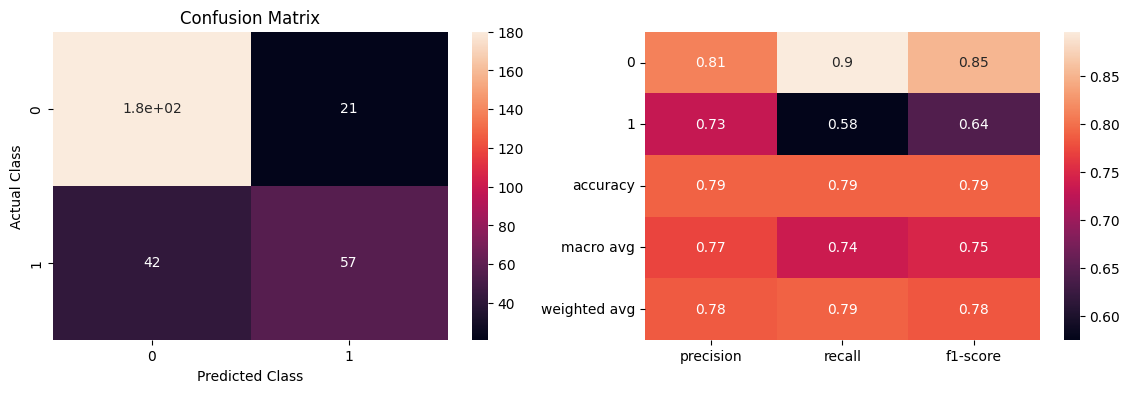

In [ ]:
## confusion matrix and classification report
## LR
cm_lr = confusion_matrix(y_val, y_pred_logreg_val)
plt.figure(figsize=(14,4)) 
plt.subplot(1,2,1)
sns.heatmap(cm_lr,annot =True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(classification_report(y_val,y_pred_logreg_val,output_dict=True)).T.iloc[:,:-1], annot = True)
plt.show()

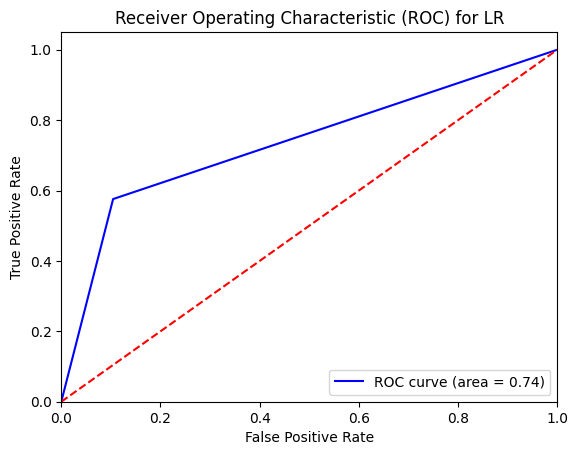

In [ ]:
## ROC-Curve
## LR
fpr, tpr, thresholds = roc_curve(y_val, y_pred_logreg_val)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for LR')
plt.legend(loc="lower right")
plt.show()

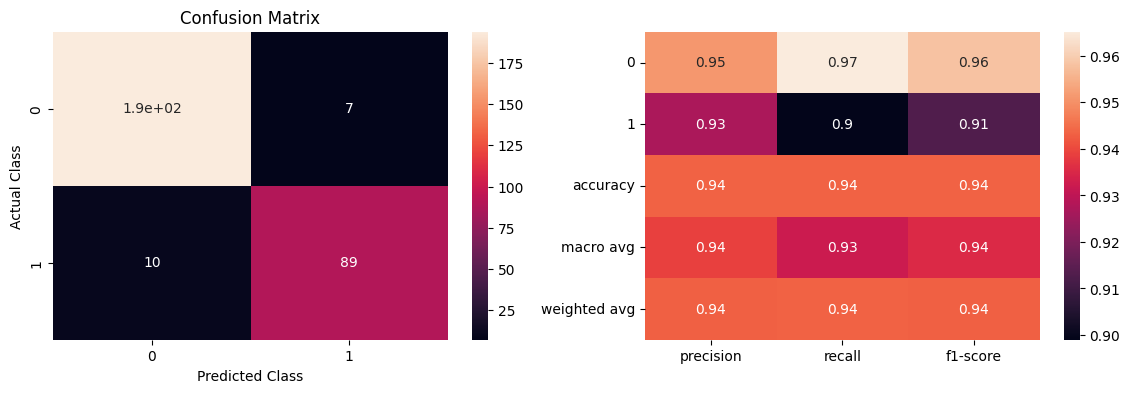

In [ ]:
## confusion matrix and classification report
## SVM
cm_svm = confusion_matrix(y_val,y_pred_svm_val)
plt.figure(figsize=(14,4)) 
plt.subplot(1,2,1)
sns.heatmap(cm_svm,annot =True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(classification_report(y_val,y_pred_svm_val,output_dict=True)).T.iloc[:,:-1], annot = True)
plt.show()

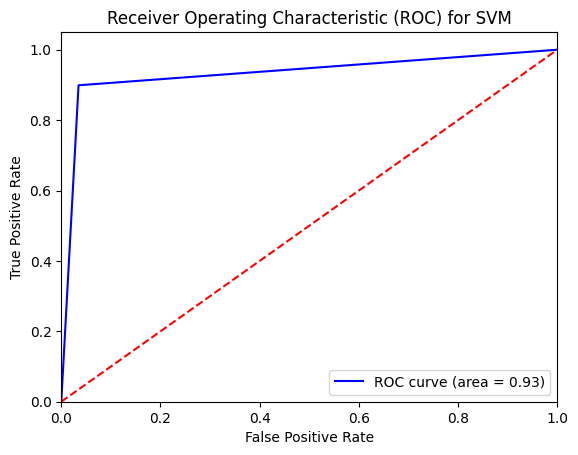

In [ ]:
## ROC-Curve
## SVM
fpr, tpr, thresholds = roc_curve(y_val,y_pred_svm_val)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for SVM')
plt.legend(loc="lower right")
plt.show()

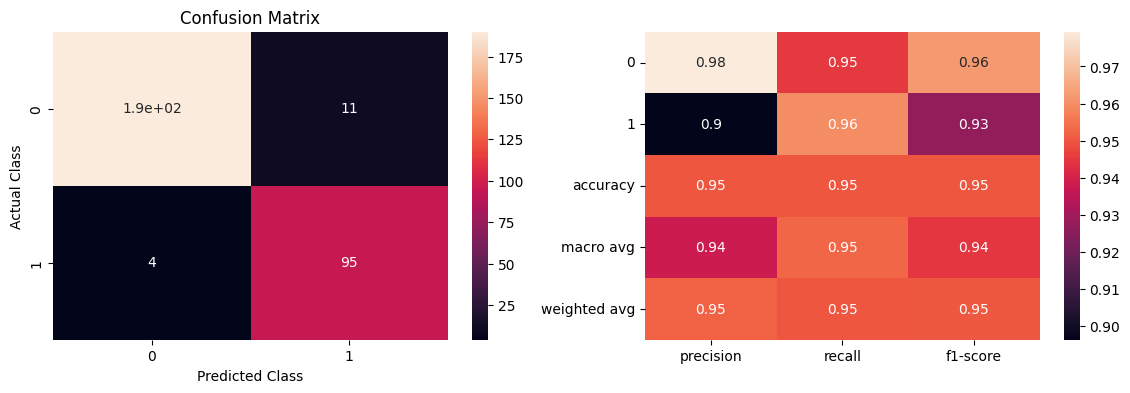

In [ ]:
## confusion matrix and classification report
## DT
cm_lr = confusion_matrix(y_val, y_pred_dt_val)
plt.figure(figsize=(14,4)) 
plt.subplot(1,2,1)
sns.heatmap(cm_lr,annot =True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(classification_report(y_val,y_pred_dt_val,output_dict=True)).T.iloc[:,:-1], annot = True)
plt.show()

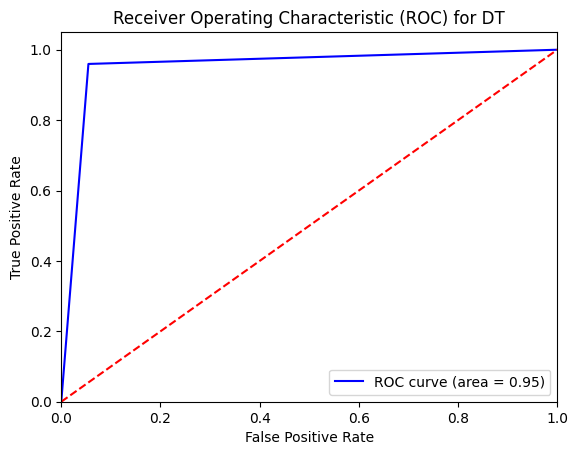

In [ ]:
## ROC-Curve
## DT
fpr, tpr, thresholds = roc_curve(y_val,y_pred_dt_val)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for DT')
plt.legend(loc="lower right")
plt.show()

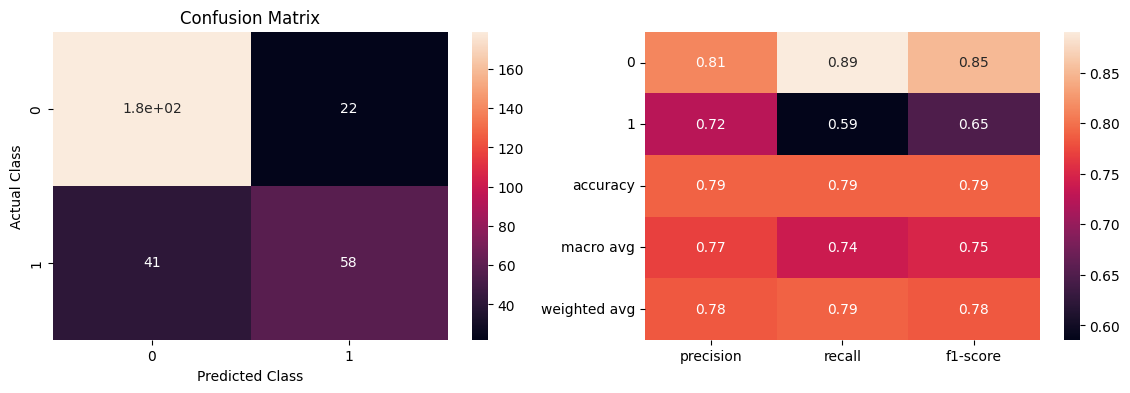

In [ ]:
## confusion matrix and classification report
## MLP
cm_lr = confusion_matrix(y_val,y_pred_mlp_val)
plt.figure(figsize=(14,4)) 
plt.subplot(1,2,1)
sns.heatmap(cm_lr,annot =True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(classification_report(y_val,y_pred_mlp_val,output_dict=True)).T.iloc[:,:-1], annot = True)
plt.show()

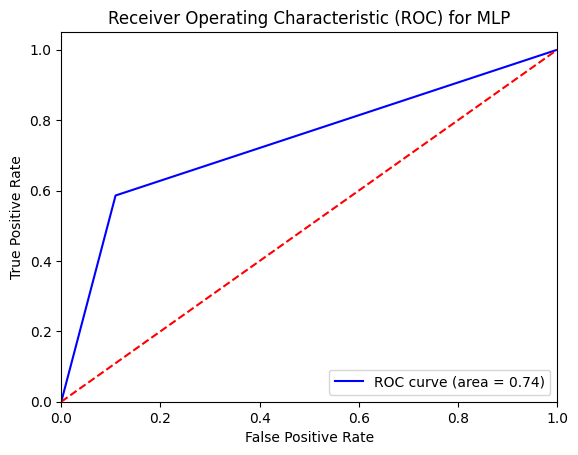

In [ ]:
## ROC-Curve
## MLP
fpr, tpr, thresholds = roc_curve(y_val, y_pred_mlp_val)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for MLP')
plt.legend(loc="lower right")
plt.show()

# Model Performance Comparison

Finally  4 different models are compared based on 

*   TP, FP, FN, TN values
*   Accuracy
*   ROC curves



In [ ]:
#TP,FP,FN,TN
data = {'Model': ['LR', 'SVM', 'DT','MLP'],
        'TP': [TP_lr, TP_svm,TP_dt, TP_mlp],
        'FP': [FP_lr, FP_svm,FP_dt, FP_mlp],
        'FN': [FN_lr, FN_svm,FN_dt, FN_mlp],
        'TN': [TN_lr, TN_svm,TN_dt, TN_mlp]
        }

table = pd.DataFrame(data=data)
print("Model comparison based on True positive (TP), False Positive (FP), False Negative (FN) and True Negative (TN)")
table

Model comparison based on True positive (TP), False Positive (FP), False Negative (FN) and True Negative (TN)


,Model,TP,FP,FN,TN
0,LR,57,21,42,180
1,SVM,89,7,10,194
2,DT,95,11,4,190
3,MLP,58,22,41,179


From the confusion matrix above, we can conclude that Logistic Regression correctly identified 57 patients as having diabetes (true positives) and 180 patients as not having diabetes (true negatives). However, 21 patients were wrongly identified as having the disease (false positives), and 42 patients were wrongly identified as not having the disease (false negatives).

The SVM model correctly predicted that 89 patients had diabetes (true positives) and that 194 patients didn't have diabetes (true negatives), but it got 10 patients wrong (false negatives) and 7 patients wrong (false positives).

The Decision Tree model correctly identified 95 patients that they had the disease (true positives) and 190 patients that they didn't have the disease (true negatives). Eleven patients were wrongly identified that they had the disease (false positives), and four patients were wrongly identified that they didn't have the disease (false negatives).

MLP identified 83 patients having the disease (true positives). 186 patients were tagged as true negatives, as in they were detected to not have the disease at all. However, the MLP model showcased 15 patients who were wrongly identified to have the disease, whereas they were not suffering from it.

So, based on the confusion matrix, Decision Tree has more true positive, less false positives, and, most importantly, the least false negatives. So, it appears that the Decision Tree model did a better job of figuring out which people had diabetes. But the SVM model did pretty well too, with only 7 wrong positives and 10 false negatives. 

LR and MLP models aren't as good because they give a lot of false positives. This could be a problem because it could mean that people who actually have diabetes might not get treatment right away.

In [ ]:
## Training accuracy
train_accuracy_lr= logreg.score(X_train_scaled, y_train)
train_accuracy_svm = svm.score(X_train_scaled, y_train)
train_accuracy_dt = dt.score(X_train_scaled, y_train)
train_accuracy_mlp = mlp.score(X_train_scaled, y_train)
##Testing accuracy
test_accuracy_lr= logreg.score(X_val_scaled, y_val)
test_accuracy_svm = svm.score(X_val_scaled, y_val)
test_accuracy_dt = dt.score(X_val_scaled, y_val)
test_accuracy_mlp = mlp.score(X_val_scaled, y_val)

data = {'Model': ['LR', 'SVM', 'DT','MLP'],
        'Training Accuracy': [train_accuracy_lr, train_accuracy_svm, train_accuracy_dt, train_accuracy_mlp],
        'Testing Accuracy': [test_accuracy_lr, test_accuracy_svm,test_accuracy_dt, test_accuracy_mlp],
        'Precision': [precision_lr, precision_svm,precision_dt, precision_mlp],
        'Recall': [recall_lr, recall_svm,recall_dt, recall_mlp],
        'f1-score': [f1score_lr, f1score_svm,f1score_dt, f1score_mlp]
        }
table = pd.DataFrame(data=data)
print("Model comparison based on Accuracy,Precision, Recall and f1-score")
table

Model comparison based on Accuracy,Precision, Recall and f1-score


,Model,Training Accuracy,Testing Accuracy,Precision,Recall,f1-score
0,LR,0.782353,0.790000,0.730769,0.575758,0.644068
1,SVM,0.975294,0.943333,0.927083,0.898990,0.912821
2,DT,0.975294,0.950000,0.896226,0.959596,0.926829
3,MLP,0.784118,0.790000,0.725000,0.585859,0.648045


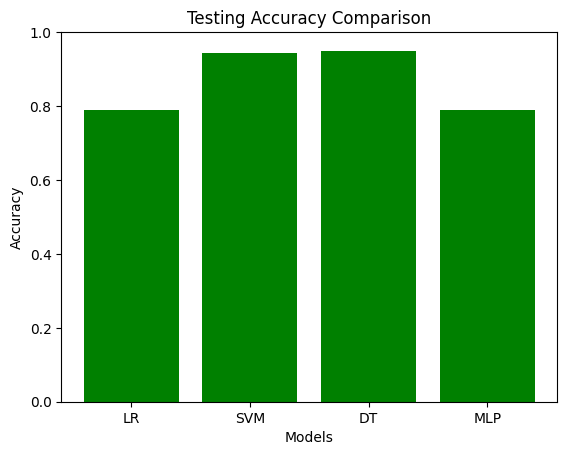

In [ ]:
models = ['LR', 'SVM', 'DT','MLP']
accuracy = [test_accuracy_lr, test_accuracy_svm, test_accuracy_dt, test_accuracy_mlp]
plt.bar(models, accuracy, color='green')
plt.ylim(0, 1)
plt.title('Testing Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

Looking at the training accuracies, both SVM and Decision Tree models have the highest training accuracy of 97.52%. 

The Logistic Regression had the least training accuracy - which was 78.23%. Also, the MLP model was found to have a training accuracy of 91.11%. 

When it comes to testing accuracy, Decision Tree model provides an accuracy score of 95%, the highest among the models. SVM model has almost same accuracy score of 94.33% and MLP model has an accuracy score of 89.66% while the Logistic Regression model was found to have a least testing accuracy of 79.00%.

Based on the given performance metrics, it appears that the Decision Tree (DT) model has the best classification performance in terms of testing accuracy, precision, recall, and f1-score and the SVM model has slightly lower performance in terms of precision, recall, and f1-score. The LR model, on the other hand, has the lowest performance metrics in all categories.

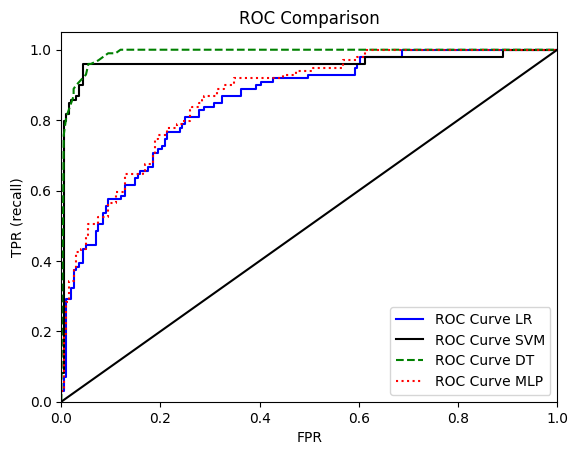

In [ ]:
## ROC curve
'''ROC curve shows the false positive rate (FPR) against the true positive rate (TPR)
The ideal ROC curve is close to the top left: a high recall while keeping a low false positive rate'''

lr_probs = logreg.predict_proba(X_val_scaled)[:, 1]
svm_probs = svm.predict_proba(X_val_scaled)[:, 1]
dt_probs = dt.predict_proba(X_val_scaled)[:, 1]
mlp_probs = mlp.predict_proba(X_val_scaled)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_val,lr_probs)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_val, svm_probs)
#fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_val, svm.decision_function(X_val_scaled))
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_val, dt_probs)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_val, mlp_probs)
plt.title('ROC Comparison')
plt.plot(fpr_lr, tpr_lr, '-b',label="ROC Curve LR")
plt.plot(fpr_svm, tpr_svm, '-k',label="ROC Curve SVM")
plt.plot(fpr_dt, tpr_dt, '--g', label="ROC Curve DT")
plt.plot(fpr_mlp, tpr_mlp, ':r', label="ROC Curve MLP")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot([0,1], [0,1], 'k')
plt.xlim(0,1)
plt.ylim(0,1.05)
plt.legend(loc=4)

According to the ROC curve, Decision Tree, Logistic Regression and SVM models have more data points that are close to the top left, with Decision Tree model having the most data points. That indicates that they produce a high recall while keeping a low false positive rate. 

So, it may be surmised that the Decision Tree model showcases better classification performance than the other models.

In summary, based on the all given performance metrics, Decision Tree model showcases the best performance metrics based on the current dataset, with both SVM and MLP models being close behind.
Their linear nature makes them suitable for handling the input features related to the health status of patients, and their performance metrics for accuracy, precision, recall, and f1-score are higher than the other models.
The Logistic Regression model showcased the poorest performance metrics and as such, this model is not suitable for the current dataset.